## Case Study Description
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

Categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then we need to suggest the countries which the CEO needs to focus on the most.

## Data Dictionary
- country- Name of the country
- child_mort- Death of children under 5 years of age per 1000 live births
- exports- Exports of goods and services per capita. Given as %age of the GDP per capita
- health- Total health spending per capita. Given as %age of GDP per capita
- imports- Imports of goods and services per capita. Given as %age of the GDP per capita
- income- Net income per person
- inflation- measurement of the annual growth rate of the GDP deflator
- life_expec- The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer- The number of children that would be born to each woman if the current age-fertility rates remain the same.
- gdpp- The GDP per capita. Calculated as the Total GDP divided by the total population.


In [1]:
#Loading packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from ipywidgets import interact
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing Dataset
df=pd.read_csv("Country-data.csv")

In [4]:
#Inspecting the dataset
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [5]:
df.shape

(167, 10)

In [6]:
#Checking for duplicates values
df.country.nunique()

167

- As the number of unique countries is equal to the number of rows in the data, there are no duplicate rows in the dataset.

In [7]:
#Checking for missing values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

- Fortunately, there are no missing observation in the data.

In [8]:
#Checking the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


- The datatype seems to be correct for all the columns.

In [9]:
#Checking the data statistics
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

It can be seen from the data description that mean and median for child_mort, income, inflation, gdpp largely and their distribution is highly skewed. This might be because of outliers.

As the health, imports and income are in the % of gdpp, it would be better if we convert these to absolute values.

In [10]:
df['health']=(df['health']*df['gdpp'])/100
df['imports']=(df['imports']*df['gdpp'])/100
df['income']=(df['income']*df['gdpp'])/100

#### Checking for outliers in Data

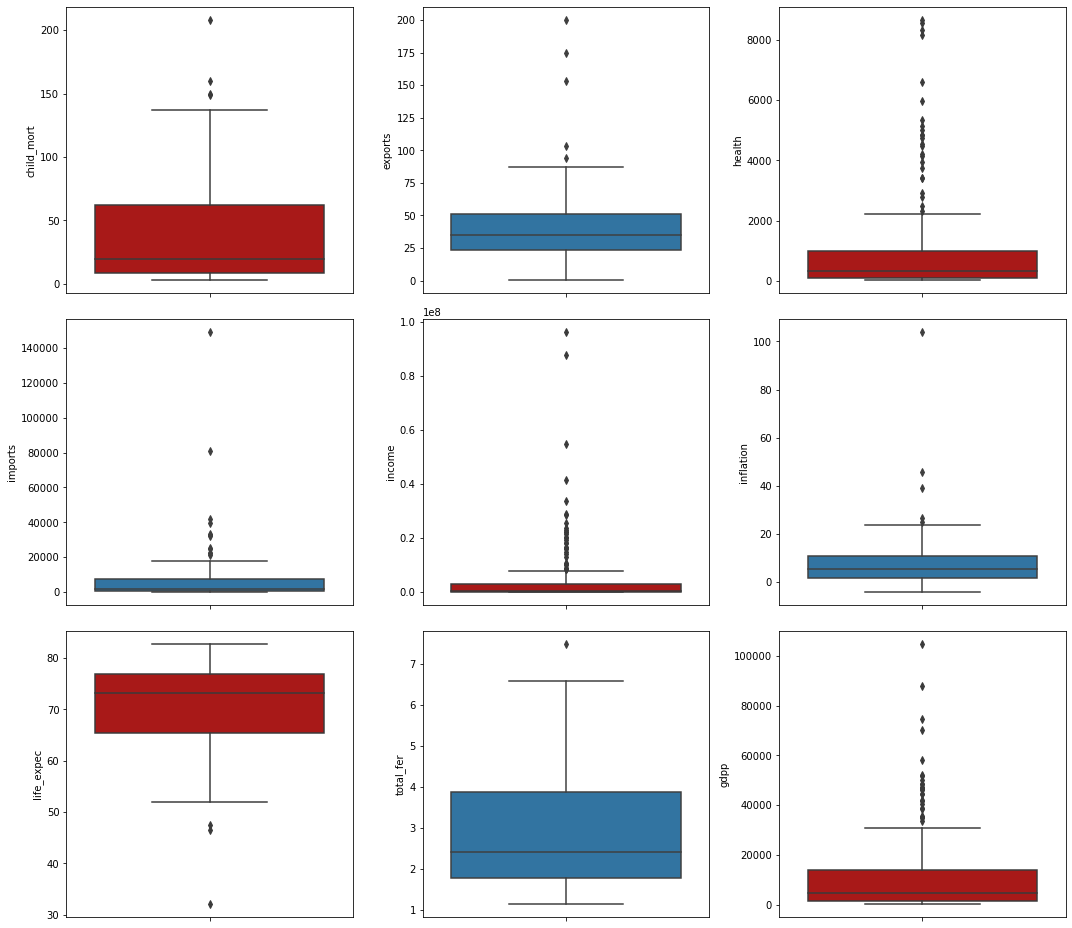

In [11]:
#Checking for outliers
plt.figure(figsize=[15,13])
plt.subplot(3,3,1)
sns.boxplot(df.child_mort,palette='gist_heat',orient='v')
plt.subplot(3,3,2)
sns.boxplot(df.exports,orient='v')
plt.subplot(3,3,3)#
sns.boxplot(df.health,palette='gist_heat',orient='v')
plt.subplot(3,3,4)
sns.boxplot(df.imports,orient='v')
plt.subplot(3,3,5)
sns.boxplot(df.income,palette='gist_heat',orient='v')
plt.subplot(3,3,6)
sns.boxplot(df.inflation,orient='v')
plt.subplot(3,3,7)
sns.boxplot(df.life_expec,palette='gist_heat',orient='v')
plt.subplot(3,3,8)
sns.boxplot(df.total_fer,orient='v')
plt.subplot(3,3,9)
sns.boxplot(df.gdpp,palette='gist_heat',orient='v')
plt.tight_layout()
plt.show()

There are outliers in the data. Now, I can either remove the outliers or decide to keep them and go on with the analysis. 

Now, the purpose of the analysis is to find under developed and poor countries, and for this purpose, I have capped the variables gdpp, income, exports, health and didn't floor them because flooring causes lost in information about the countries that concern us.

In [12]:
percentiles = df['health'].quantile([0.05,0.8]).values
df['health'][df['health'] >= percentiles[1]] = percentiles[1]

percentiles = df['income'].quantile([0.05,0.8]).values
df['income'][df['income'] >= percentiles[1]] = percentiles[1]

percentiles = df['gdpp'].quantile([0.05,0.8]).values
df['gdpp'][df['gdpp'] >= percentiles[1]] = percentiles[1]

percentiles = df['imports'].quantile([0.05,0.8]).values
df['imports'][df['imports'] >= percentiles[1]] = percentiles[1]

percentiles = df['exports'].quantile([0.05,0.8]).values
df['exports'][df['exports'] >= percentiles[1]] = percentiles[1]

#### Checking for the outliers now.

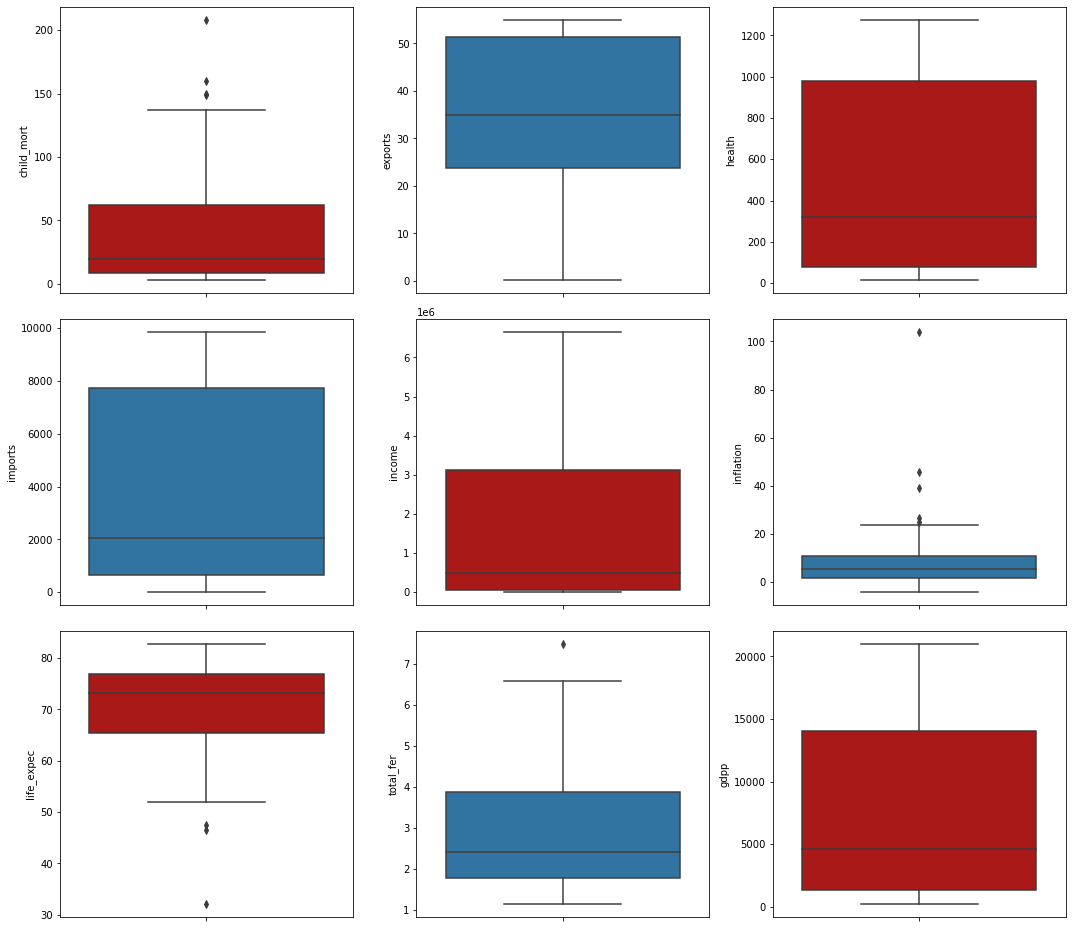

In [13]:
#Checking for outliers
plt.figure(figsize=[15,13])
plt.subplot(3,3,1)
sns.boxplot(df.child_mort,palette='gist_heat',orient='v')
plt.subplot(3,3,2)
sns.boxplot(df.exports,orient='v')
plt.subplot(3,3,3)#
sns.boxplot(df.health,palette='gist_heat',orient='v')
plt.subplot(3,3,4)
sns.boxplot(df.imports,orient='v')
plt.subplot(3,3,5)
sns.boxplot(df.income,palette='gist_heat',orient='v')
plt.subplot(3,3,6)
sns.boxplot(df.inflation,orient='v')
plt.subplot(3,3,7)
sns.boxplot(df.life_expec,palette='gist_heat',orient='v')
plt.subplot(3,3,8)
sns.boxplot(df.total_fer,orient='v')
plt.subplot(3,3,9)
sns.boxplot(df.gdpp,palette='gist_heat',orient='v')
plt.tight_layout()
plt.show()

#### The data looks much more cleaner now.

## Univariate analysis

In [14]:
df_num=df.iloc[:,1:]

#### Checking the distribution of each of the variable.

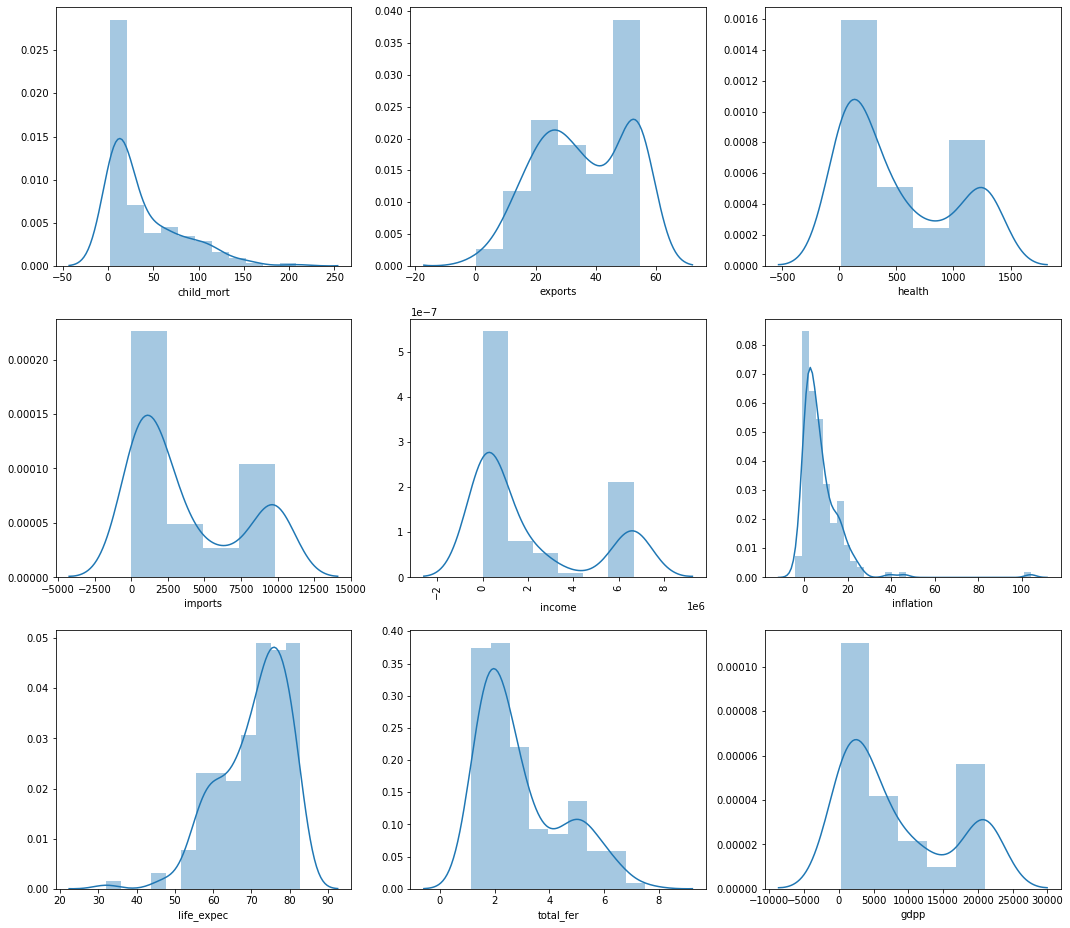

In [15]:
plt.figure(figsize=[15,13])
plt.subplot(3,3,1)
sns.distplot(df.child_mort)
plt.subplot(3,3,2)
sns.distplot(df.exports)
plt.subplot(3,3,3)
sns.distplot(df.health)
plt.subplot(3,3,4)
sns.distplot(df.imports)
plt.subplot(3,3,5)
sns.distplot(df.income)
plt.xticks(rotation=90)
plt.subplot(3,3,6)
sns.distplot(df.inflation)
plt.subplot(3,3,7)
sns.distplot(df.life_expec)
plt.subplot(3,3,8)
sns.distplot(df.total_fer)
plt.subplot(3,3,9)
sns.distplot(df.gdpp)
plt.tight_layout()
plt.show()

As we saw in the boxplots for each of the variables, the distribution plots are not very skewed now.

#### Now, I want to plot the bottom 15 countries for each of the variable to look which are the countries of focus. 

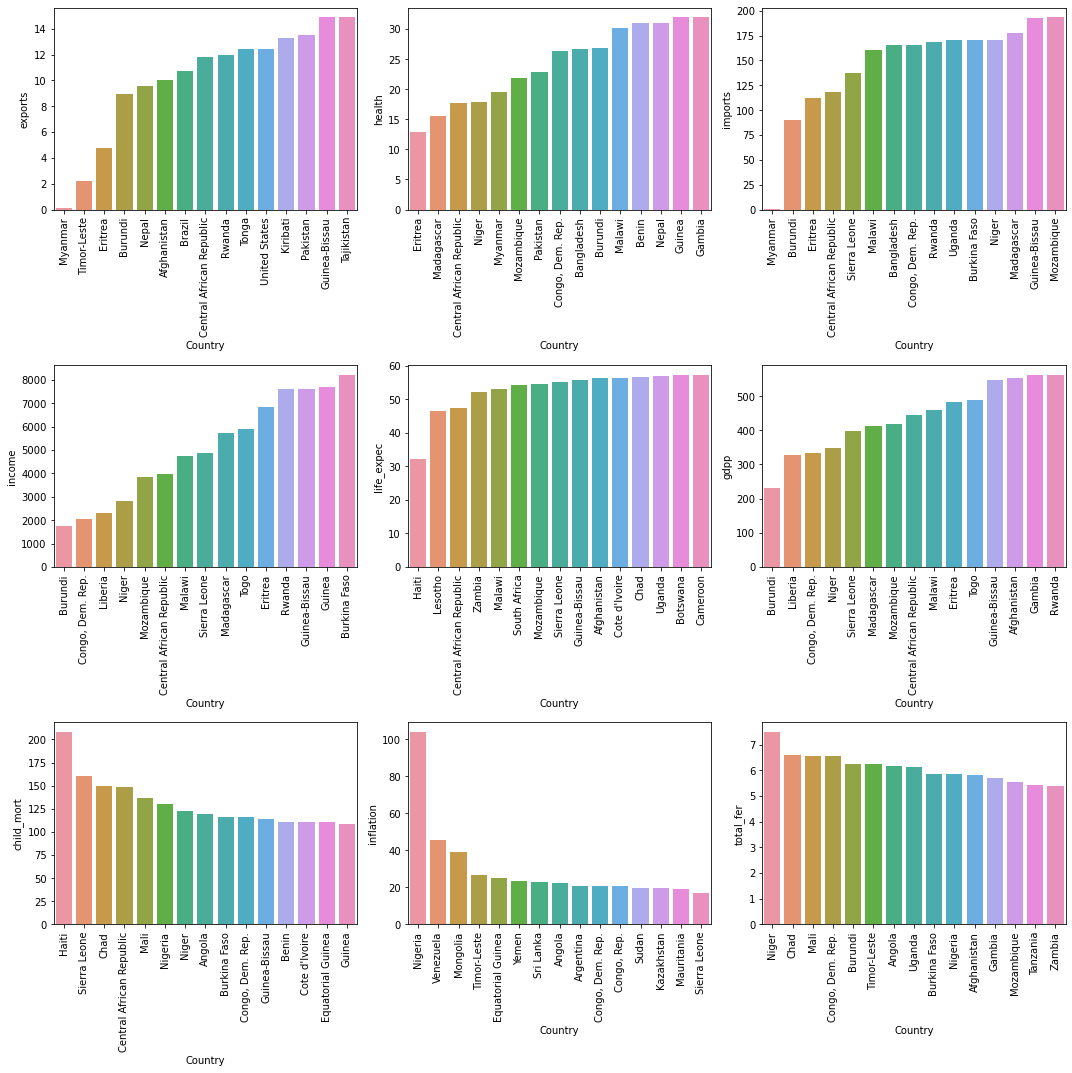

In [16]:
l=['exports', 'health', 'imports', 'income', 'life_expec', 'gdpp']
plt.figure(figsize=[15,15])
c=1
backward_countries=[]
for i in l:
    data=df[["country",i]].sort_values(by=i,ascending=True).head(15)
    plt.subplot(3,3,c)
    sns.barplot(x=data.country, y=data[i])
    plt.ylabel(i)
    plt.xlabel("Country")
    backward_countries.extend(list(data.country))
    c+=1
    plt.xticks(rotation=90)
l=['child_mort', 'inflation', 'total_fer']    
for i in l:
    data=df[["country",i]].sort_values(by=i,ascending=False).head(15)
    plt.subplot(3,3,c)
    sns.barplot(x=data.country, y=data[i])
    plt.ylabel(i)
    plt.xlabel("Country")
    backward_countries.extend(list(data.country))
    c+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

I made a list of countries that appeared in the above graphs and notes the countries that appear in 2 or more graphs. These are the countries I label as backwards using EDA. Later we will check how many of these countries will appear using clustering.

In [17]:
d={}
for i in backward_countries:
    if i not in d.keys():
        d[i]=1
    else:
        d[i]+=1
        
backward_countries=[]
for k,v in d.items():
    if v>=2:
        backward_countries.append(k)
backward_countries=set(backward_countries)
    


In [18]:
print(backward_countries)

{'Niger', 'Congo, Dem. Rep.', 'Eritrea', 'Pakistan', 'Chad', 'Burundi', 'Nepal', 'Nigeria', 'Afghanistan', 'Guinea-Bissau', 'Uganda', 'Madagascar', 'Timor-Leste', 'Guinea', 'Central African Republic', "Cote d'Ivoire", 'Rwanda', 'Mali', 'Haiti', 'Equatorial Guinea', 'Sierra Leone', 'Benin', 'Togo', 'Zambia', 'Bangladesh', 'Angola', 'Myanmar', 'Malawi', 'Burkina Faso', 'Gambia', 'Liberia', 'Mozambique'}


In [19]:
len(backward_countries)

32

#### We have a list of 32 countries that can be called backwards using our eda

## Bivariate analysis

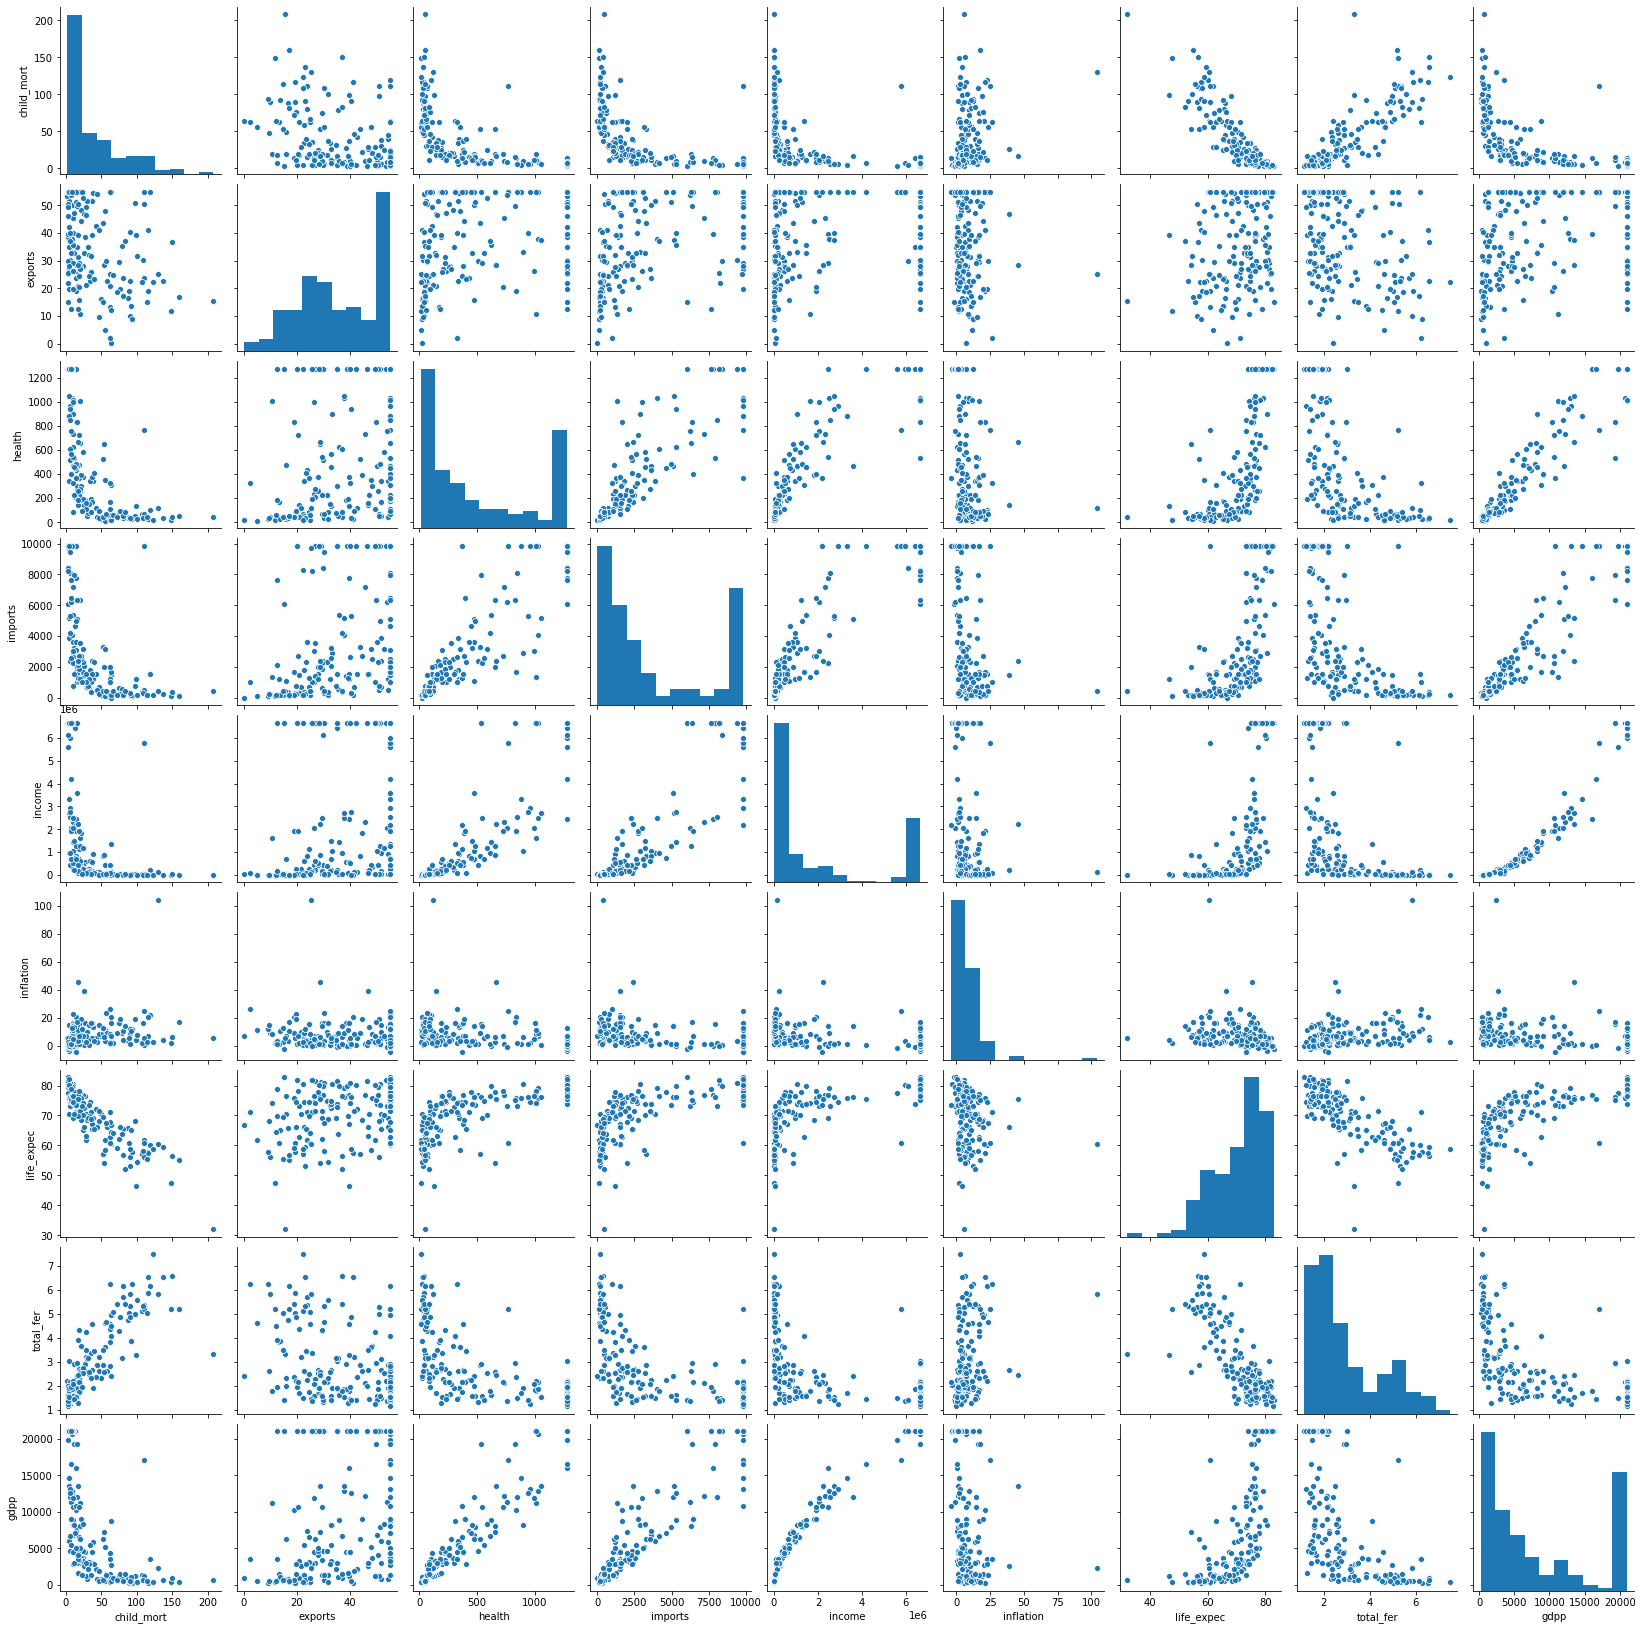

In [20]:
sns.pairplot(df)
plt.show()

There seems to be a very high linear relationship between a lot of variables. We can confirm this using a heatmap.

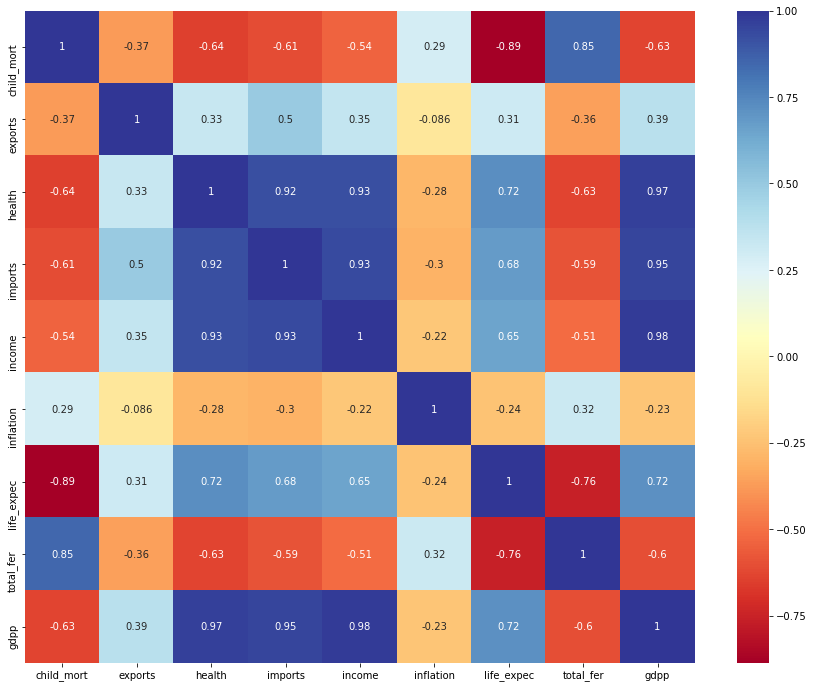

In [21]:
plt.figure(figsize=[15,12])
sns.heatmap(df.corr(),annot=True,cmap="RdYlBu")
plt.yticks(rotation=90)
plt.show()

- There is a very high negative correlation between life expectancy and child_mort, total_fer and life expectancy
- There is a very high positive correlation between income and gdpp, life_expec and income, imports and exports

I researched a bit about whether or not collinearity a problem in clustering and how the problem differs from multicollinearity issue in regression.
- When variables used in clustering are collinear, some variables get a higher weight than others. If two variables are perfectly correlated, they effectively represent the same concept. But that concept is now represented twice in the data and hence gets twice the weight of all the other variables. The final solution is likely to be skewed in the direction of that concept, which could be a problem if it’s not anticipated. In the case of multiple variables and multicollinearity, the analysis is in effect being conducted on some unknown number of concepts that are a subset of the actual number of variables being used in the analysis.
So our approach to the analysis could either be -
- Dropping some of the variables
- Using feature reduction techniques like- PCA.

Dropping information results in loss of information and hence we'll try to explore PCA.

### Standardizing the Data

In [22]:
df_num=df.iloc[:,1:]

In [23]:
scaler=StandardScaler()

In [24]:
df_num=scaler.fit_transform(df_num)

In [25]:
df_num=pd.DataFrame(df_num)
df_num.columns=df.columns[1:]

In [26]:
df_num.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.709632 -0.968808 -0.945743 -0.766150   0.157336   -1.619092   
1   -0.538949 -0.517518 -0.494736 -0.477820 -0.615162  -0.312347    0.647866   
2   -0.272833  0.171259 -0.666579 -0.635808 -0.550848   0.789274    0.670423   
3    2.007808  1.266679 -0.845689 -0.605160 -0.690371   1.387054   -1.179234   
4   -0.695634  0.641482  0.486576  0.920496  0.116173  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.988230  
1  -0.859973 -0.534548  
2  -0.038404 -0.487089  
3   2.128151 -0.606378  
4  -0.541946  0.505701

### Applying PCA

#### First we need to decide how many number of components should be constructed. We'll do it using screeplot

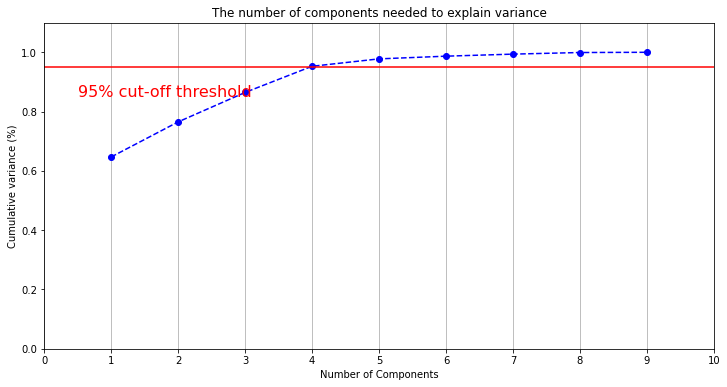

In [27]:
pca = PCA(random_state=42).fit(df_num)

plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, 10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

#### Thus as we see here, taking 4 components explains 95% of the variance. We can also increase the cuttoff variance to 99%

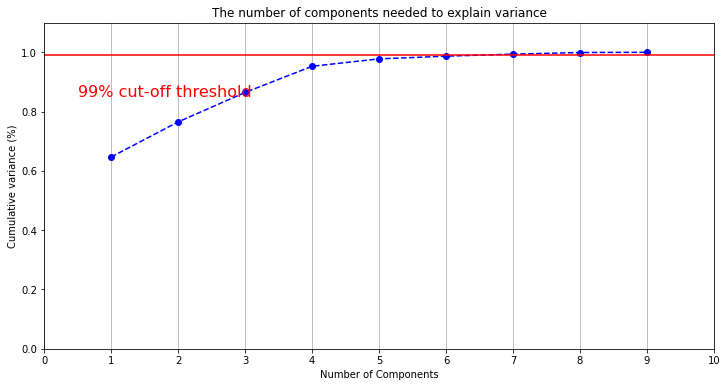

In [28]:
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, 10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

#### Thus, taking 5 components explains 99% of the variance. We are going to go ahead with 5 components.

In [29]:
pca.components_

array([[ 0.34013553, -0.20084844, -0.38746228, -0.38630907, -0.37059154,
         0.14641625, -0.35537633,  0.32676464, -0.39084874],
       [ 0.43341376,  0.08601896,  0.21574606,  0.26309124,  0.36963211,
         0.45277125, -0.26649688,  0.43969407,  0.28811234],
       [-0.23610108,  0.53694657, -0.1556571 , -0.09136977, -0.16604317,
         0.72529525,  0.15687623, -0.18480953, -0.10478001],
       [-0.15818826, -0.79020438,  0.10798339, -0.11909206,  0.05937547,
         0.48150754,  0.27246487, -0.09926371,  0.07242127],
       [ 0.21579968, -0.07709269,  0.11997619,  0.01704897, -0.00961547,
         0.09730686, -0.5955745 , -0.75237044,  0.04970827],
       [ 0.74510361,  0.06445239, -0.10055207, -0.05994618,  0.03991392,
        -0.02981791,  0.5860499 , -0.2813983 , -0.04290132],
       [-0.09258925, -0.11139158, -0.80793375,  0.33843675,  0.44579167,
         0.00784084, -0.05287379, -0.09994085, -0.01213522],
       [ 0.063816  , -0.12921758,  0.05454615,  0.79896993, -0

#### We will use incremental PCA for efficiency

In [30]:
pca=IncrementalPCA(n_components=5)
df_pca=pca.fit_transform(df_num)
df_pca=pd.DataFrame(df_pca)
df_pca.columns=["pca_1","pca_2","pca_3","pca_4","pca_5"]
df_pca.head(10)

pca_1     pca_2     pca_3     pca_4     pca_5
0 -3.413734  0.727820 -1.245927 -0.481617  0.205138
1 -0.176843 -1.585078  0.158663 -0.532432 -0.055831
2 -0.636003 -0.598036  1.143762 -0.412323  0.484210
3 -2.800440  2.085688  1.003677  1.283035  0.564109
4  1.665775 -0.408651  0.050984  0.455022  0.167646
5  0.266491 -0.054774  0.524607 -1.939521 -0.121834
6 -0.687751 -1.520943  0.138565 -0.933874 -0.273208
7  3.392903  0.525496 -1.369605 -1.285154  0.137391
8  3.866045  0.589508 -0.228810  0.385362 -0.040183
9 -0.352038 -0.379002  1.383722  0.671829 -0.508216

Let's try to visualize some of PCA 1 with PCA 2

In [31]:
pca_1=pca.components_[0]
pca_2=pca.components_[1]

In [32]:
pca_12=pd.DataFrame()
pca_12["pca_1"]=pca_1
pca_12["pca_2"]=pca_2
pca_12["variable"]=df_num.columns

In [33]:
fig=px.scatter(pca_12,y='pca_1',x='pca_2',color='variable')
fig.show()

pca_1 apparently has the a high value of life expectancy and pca 2 has a high value of child mortaltiy.

#### As we have used PCA to eliminate collinearity between variables, let's check whether it has performed the task

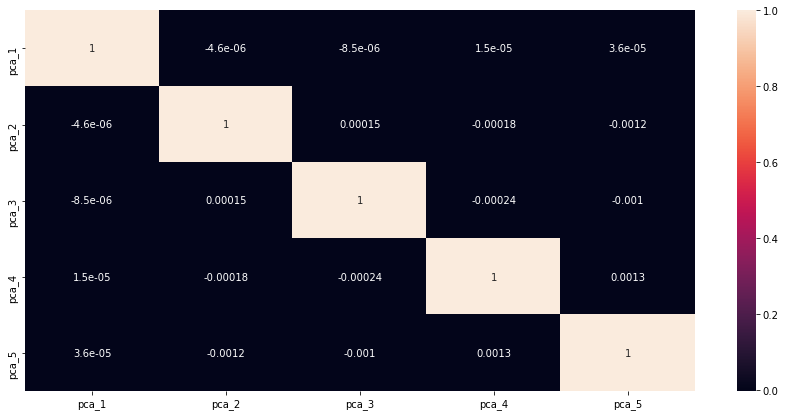

In [34]:
plt.figure(figsize=[15,7])
sns.heatmap(df_pca.corr(),annot=True)
plt.yticks(rotation=90)
plt.show()

The correlation is almost zero between all the components and hence there is no collinearity in these components.

#### Getting pairplots now

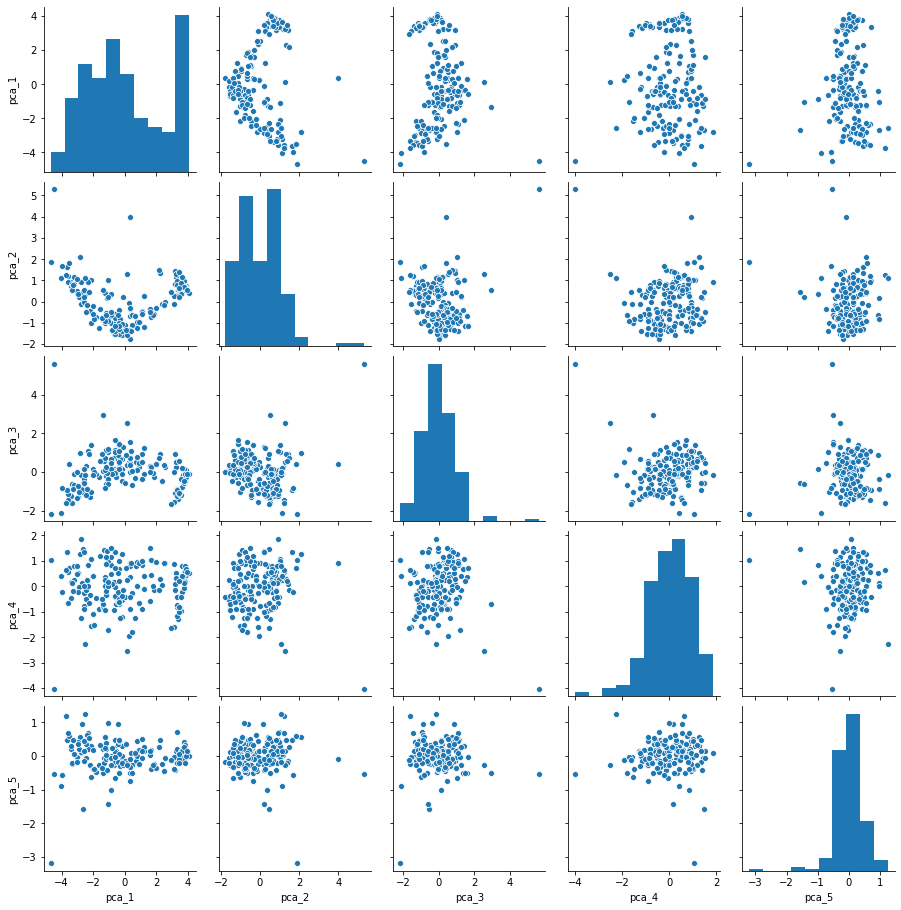

In [35]:
sns.pairplot(df_pca)
plt.show()

#### Now that our data is ready, we'll go ahead with the clustering. Before starting with clustering, we'll first check whether or not the data is suitable for clustering using the hopkins statistics.

In [36]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H
l=[]
for i in range(10):
    l.append(hopkins(df_pca))

In [37]:
print(l)

[0.8391908404216029, 0.8750736475938309, 0.8518927325312343, 0.8481586937677029, 0.840095517052439, 0.8078481086205233, 0.8476215874695214, 0.7824289423856744, 0.8329184342516025, 0.7069982659473508]


#### As all the values lie between {0.7, ..., 0.99}, the data has a high tendency to cluster.

### Modeling

#### Before modeling, we will decide the optimal number of clusters. It can be done using 2 approached:- 

- Using SSD
- Using Silhouette Analysis

### Using SSD

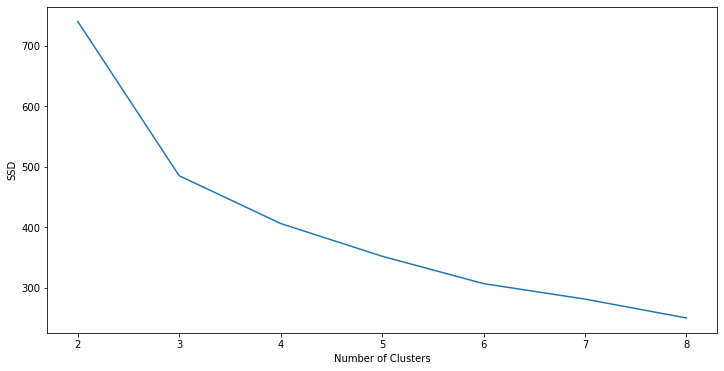

In [38]:
range_n_clusters=[2,3,4,5,6,7,8]
ssd=[]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(df_pca)
    ssd.append(kmeans.inertia_)
plt.plot(range_n_clusters,ssd)
plt.xlabel("Number of Clusters")
plt.ylabel("SSD")
plt.show()
    

### Using Silhouette Analysis

In [39]:
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(df_pca)
    
    cluster_labels=kmeans.labels_
    avg_score=silhouette_score(df_pca,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters,avg_score))

For n_clusters=2, the silhouette score is 0.4551979910680447
For n_clusters=3, the silhouette score is 0.4214605163153466
For n_clusters=4, the silhouette score is 0.42562487169577967
For n_clusters=5, the silhouette score is 0.37318440422978744
For n_clusters=6, the silhouette score is 0.3272609804595028
For n_clusters=7, the silhouette score is 0.3128863139248448
For n_clusters=8, the silhouette score is 0.3077436233201838


From both SSD and Silhouette Analysis, I conclude that 3 is the optimal number of clusters for our analysis.

### K-Means Clustering

In [40]:
kmeans=KMeans(n_clusters=3,max_iter=50,random_state=42)
kmeans.fit(df_pca)

KMeans(max_iter=50, n_clusters=3, random_state=42)

In [41]:
kmeans.labels_

array([2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2,
       2, 1, 0, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [42]:
df["cluster_id"]=kmeans.labels_

In [43]:
df_pca["country"]=df.country
df_pca["cluster_id"]=kmeans.labels_

In [44]:
df.head()

country  child_mort  exports    health   imports     income  \
0          Afghanistan        90.2    10.00   41.9174   248.297     8903.3   
1              Albania        16.6    28.00  267.8950  1987.740   406137.0   
2              Algeria        27.3    38.40  185.9820  1400.440   575340.0   
3               Angola       119.0    54.94  100.6050  1514.370   208270.0   
4  Antigua and Barbuda        10.3    45.50  735.6600  7185.800  2330200.0   

   inflation  life_expec  total_fer     gdpp  cluster_id  
0       9.44        56.2       5.82    553.0           2  
1       4.49        76.3       1.65   4090.0           1  
2      16.10        76.5       2.89   4460.0           1  
3      22.40        60.1       6.16   3530.0           2  
4       1.44        76.8       2.13  12200.0           0

We'll compare the clusters using these three variables:- gdpp, child_mort and income

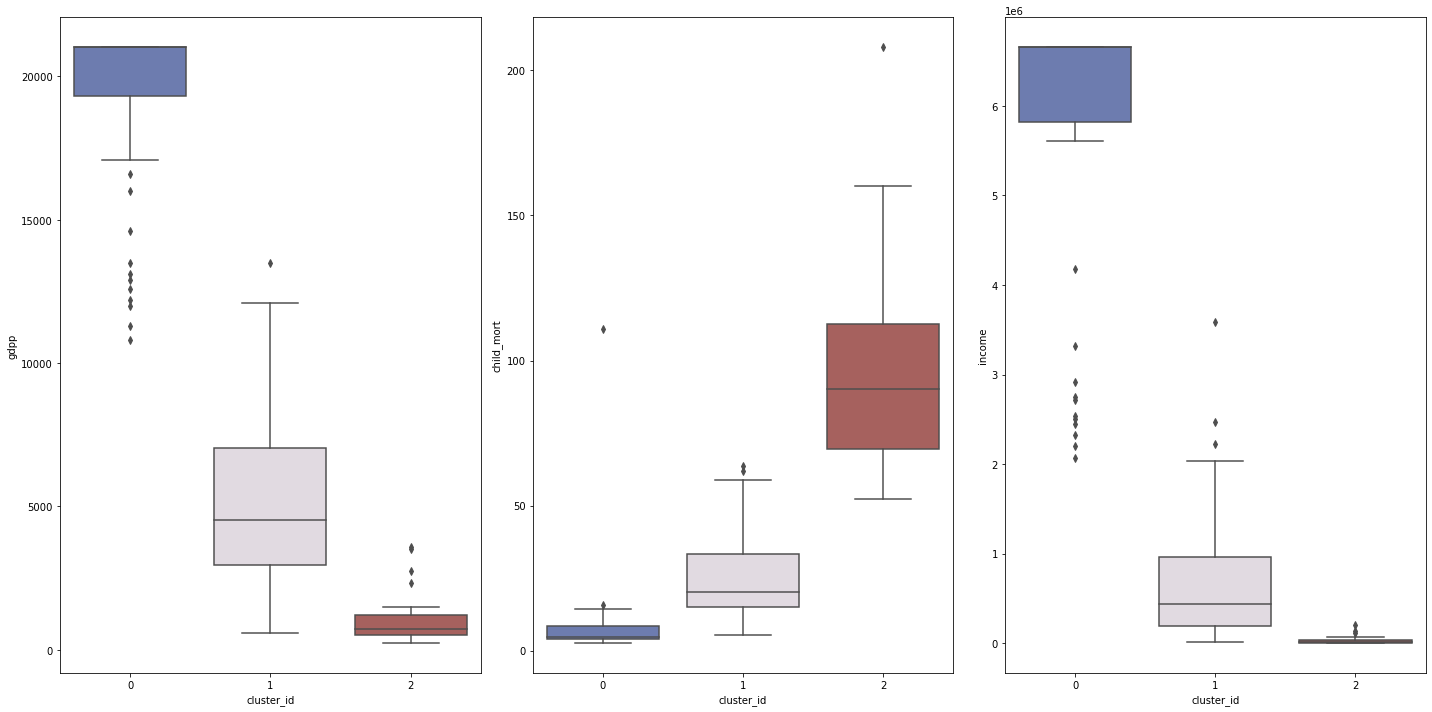

In [45]:
plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
sns.boxplot(y=df.gdpp,x=df.cluster_id,palette="twilight_shifted")
plt.subplot(1,3,2)
sns.boxplot(y=df.child_mort,x=df.cluster_id,palette="twilight_shifted")
plt.subplot(1,3,3)
sns.boxplot(y=df.income,x=df.cluster_id,palette="twilight_shifted")
plt.tight_layout()
plt.show()

It's clearly visible from the boxplots that cluster 2 consists of countries that have low income and gdpp but a very high child_mortality rate and hence this cluster is the cluster of interest for us. 

We can see the boxplots for all the variables below:-

In [46]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fivethirtyeight')
@interact
def check(variable=df.columns[1:10]):
    sns.boxplot(y=df[variable],x=df.cluster_id)
    plt.show()
    

interactive(children=(Dropdown(description='variable', options=('child_mort', 'exports', 'health', 'imports', …

#### Examining all the boxplot for all the variables, it's more certain that cluster  2 is the cluster of interest for us.`

In [47]:
fig=px.scatter(df_pca,y="pca_1",x="pca_2",color="cluster_id",hover_data=["cluster_id","country"])
fig.show()

#### The clusters are clearly visible.

### Next we can visualize the clusters formed for all the orginal variables pairwise.

In [48]:
@interact
def check(variable1=df_num.columns,variable2=df_num.columns):
    if variable1!=variable2:
        fig=px.scatter(df,y=variable1,x=variable2,color="cluster_id",hover_data=["cluster_id","country"])
        fig.show()

interactive(children=(Dropdown(description='variable1', options=('child_mort', 'exports', 'health', 'imports',…

In [49]:
k_means=list(df.country[df.cluster_id==2])
print(k_means)

['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Eritrea', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']


In [50]:
df.country[df.cluster_id==2].shape

(43,)

### Hierarchical Clustering

In [51]:
df_num.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.709632 -0.968808 -0.945743 -0.766150   0.157336   -1.619092   
1   -0.538949 -0.517518 -0.494736 -0.477820 -0.615162  -0.312347    0.647866   
2   -0.272833  0.171259 -0.666579 -0.635808 -0.550848   0.789274    0.670423   
3    2.007808  1.266679 -0.845689 -0.605160 -0.690371   1.387054   -1.179234   
4   -0.695634  0.641482  0.486576  0.920496  0.116173  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.988230  
1  -0.859973 -0.534548  
2  -0.038404 -0.487089  
3   2.128151 -0.606378  
4  -0.541946  0.505701

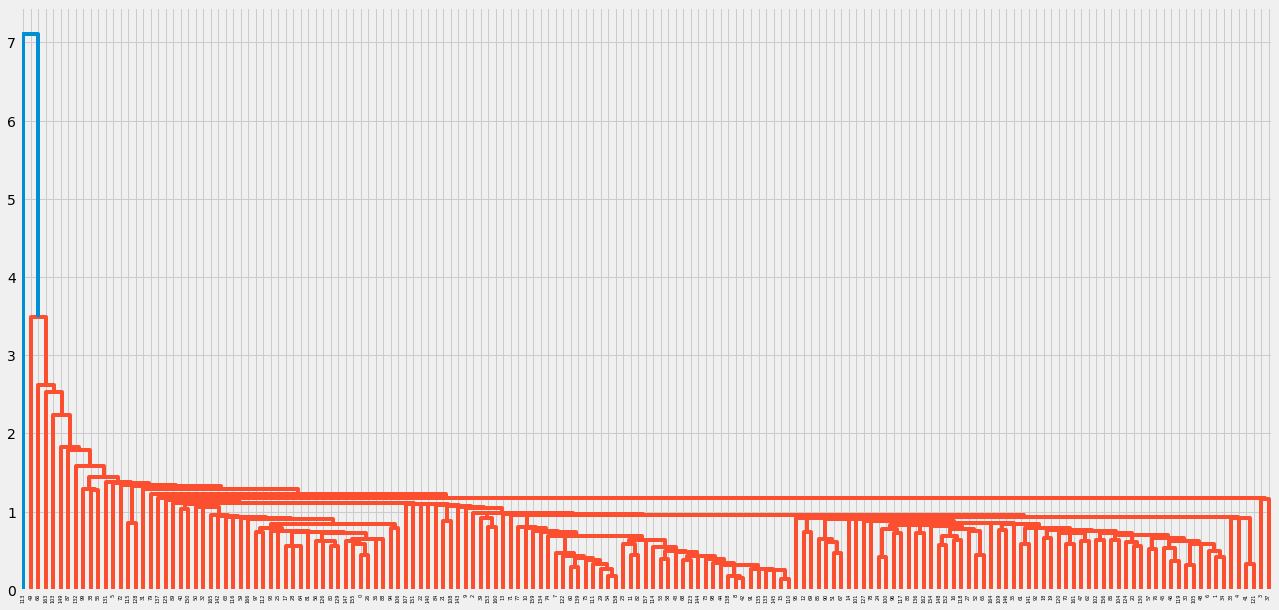

In [52]:
#Single linkage
plt.figure(figsize=[20,10])
mergings=linkage(df_num, method="single", metric="euclidean")
dendrogram(mergings)
plt.xticks(rotation=90)
plt.show()

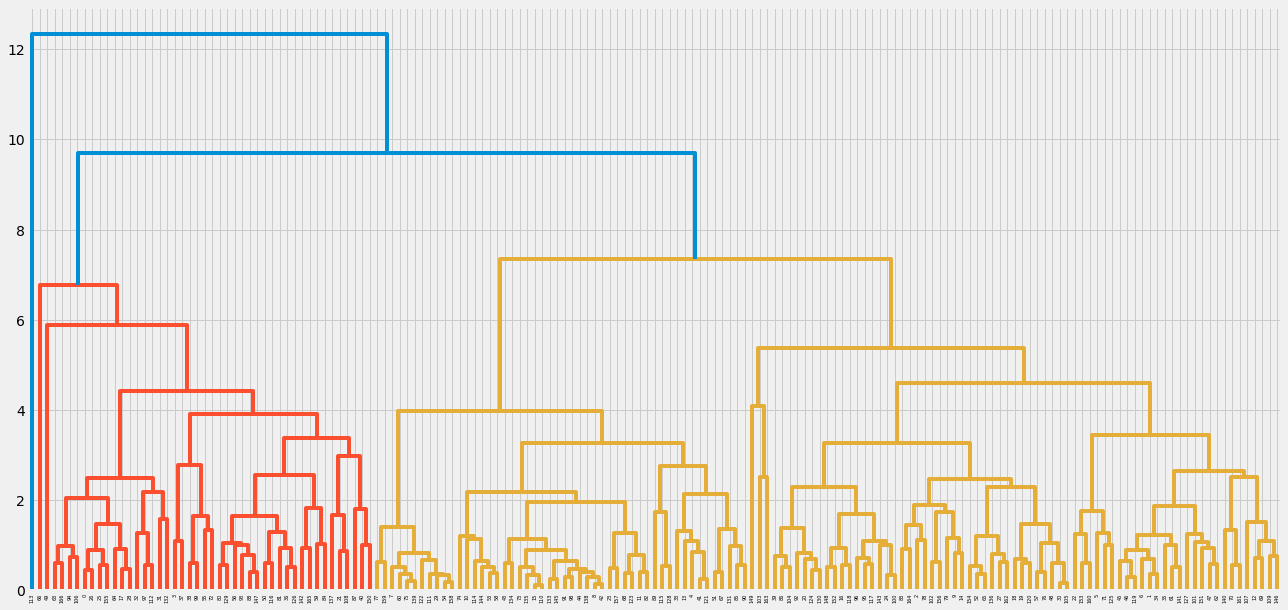

In [53]:
#complete linkage
plt.figure(figsize=[20,10])
mergings=linkage(df_pca.iloc[:,0:5], method="complete", metric="euclidean")
dendrogram(mergings)
plt.xticks(rotation=90)
plt.show()

Complete linkage has a much better dendrogram that the simple linkage. Also, in complete linkage, we can either choose number of clusters to be 2 or 4. I'd go with 4 as 2 will result a large number of countries.


In [54]:
cluster_labels=cut_tree(mergings,n_clusters=4).reshape(-1,)
cluster_labels

array([0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0,
       0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 3, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [55]:
df["cluster_id2"]=cluster_labels
df_pca["cluster_id2"]=cluster_labels

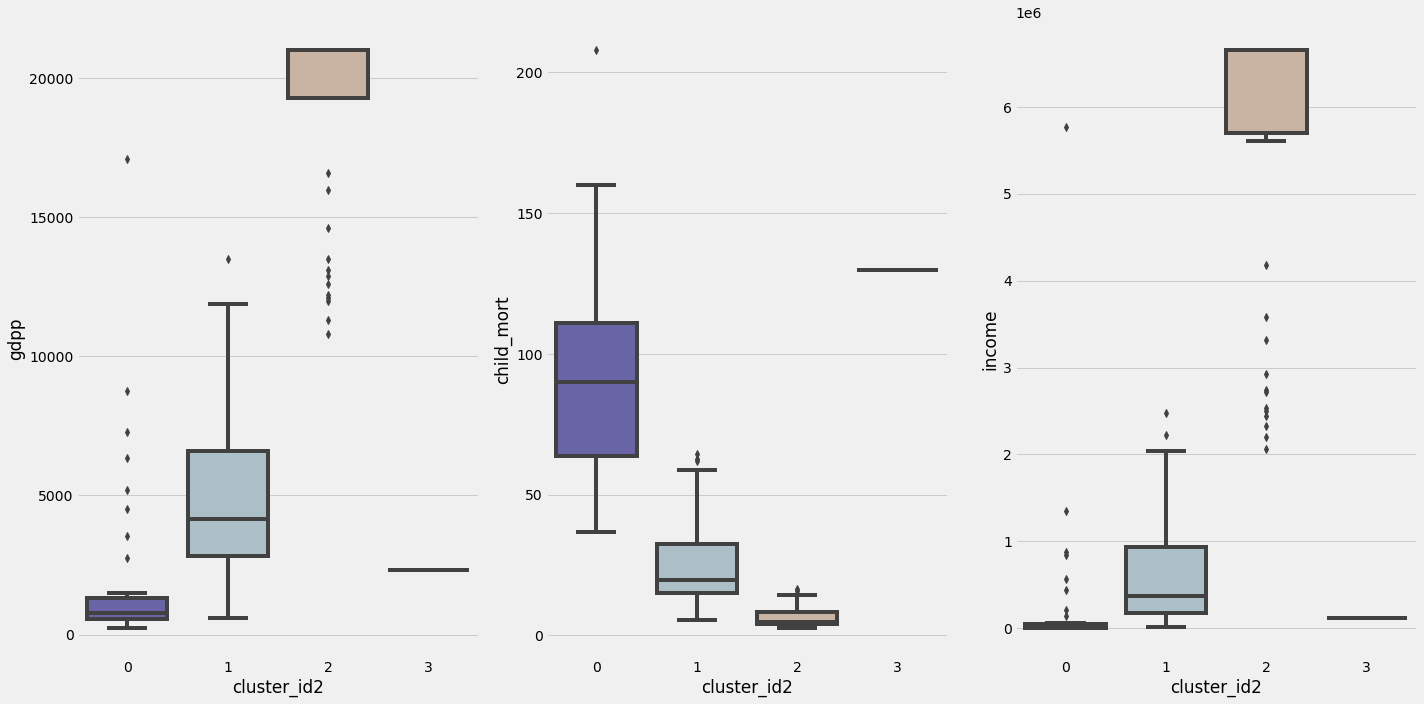

In [56]:
plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
sns.boxplot(y=df.gdpp,x=df.cluster_id2,palette="twilight_shifted")
plt.subplot(1,3,2)
sns.boxplot(y=df.child_mort,x=df.cluster_id2,palette="twilight_shifted")
plt.subplot(1,3,3)
sns.boxplot(y=df.income,x=df.cluster_id2,palette="twilight_shifted")
plt.tight_layout()
plt.show()

The cluster of our interest is 0 as it has low gdpp, income and a high child mortality.

In [57]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fivethirtyeight')
@interact
def check(variable=df.columns[1:10]):
    sns.boxplot(y=df[variable],x=df.cluster_id2)
    plt.show()
    

interactive(children=(Dropdown(description='variable', options=('child_mort', 'exports', 'health', 'imports', …

In [58]:
@interact
def check(variable1=df_pca.iloc[:,0:5].columns,variable2=df_pca.iloc[:,0:5].columns):
    if variable1!=variable2:
        fig=px.scatter(df_pca,y=variable1,x=variable2,color="cluster_id2",hover_data=["cluster_id2","country"])
        fig.show()

interactive(children=(Dropdown(description='variable1', options=('pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5'),…

In [59]:
@interact
def check(variable1=df_num.columns,variable2=df_num.columns):
    if variable1!=variable2:
        fig=px.scatter(df,y=variable1,x=variable2,color="cluster_id2",hover_data=["cluster_id2","country"])
        fig.show()

interactive(children=(Dropdown(description='variable1', options=('child_mort', 'exports', 'health', 'imports',…

#### We can see the clusters and identify the countries that interests us.

## Choosing the countries to be reccomended.`

### Countries we got using k_means

In [60]:
print(k_means)

['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Eritrea', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']


### Countries we got using hierarchical clustering

In [61]:
hier=df.country[df.cluster_id2==0].values
print(hier)

['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Namibia' 'Niger' 'Pakistan' 'Rwanda' 'Senegal'
 'Sierra Leone' 'South Africa' 'Sudan' 'Tanzania' 'Togo' 'Uganda' 'Yemen'
 'Zambia']


In [62]:
print("Number of countries from k-means: ",len(k_means))
print("Number of countries from hierarchical: ",len(hier))

Number of countries from k-means:  43
Number of countries from hierarchical:  45


#### Countries that we got using hierarchical but not by k_means

In [63]:
set(hier)-set(k_means)

{'Botswana', 'Equatorial Guinea', 'Gabon', 'Iraq', 'Namibia', 'South Africa'}

#### Countries that we got using k_means but not hierarchical 

In [64]:
set(k_means)-set(hier)

{'Myanmar', 'Nigeria', 'Tajikistan', 'Timor-Leste'}

#### We'll check which of these countries are present in the backward countries we calculated using the EDA.

In [65]:
{'Myanmar', 'Nigeria', 'Tajikistan', 'Timor-Leste',
 'Botswana', 'Equatorial Guinea', 'Gabon', 'Iraq', 'Namibia', 'South Africa'}.intersection(set(d.keys()))

{'Botswana',
 'Equatorial Guinea',
 'Myanmar',
 'Nigeria',
 'South Africa',
 'Tajikistan',
 'Timor-Leste'}

I'll add these countries to the countries intersection of the countries we got using the hierarchical and k-means clustering.

In [66]:
cluster_backward_countries=list(set(hier).intersection(set(k_means)))+['Botswana',
 'Equatorial Guinea',
 'Myanmar',
 'Nigeria',
 'South Africa',
 'Tajikistan',
 'Timor-Leste']

### Checking out how many countries got pointed out using clustering from the countries derived from the EDA.

In [67]:
len(backward_countries.intersection(cluster_backward_countries))

30

Hence, 30 of the 32 countries are identified using the cluster which is a very good number.

### Countries in need to be funded are:-

In [68]:
print(cluster_backward_countries)

['Congo, Rep.', 'Tanzania', 'Congo, Dem. Rep.', 'Niger', 'Chad', 'Eritrea', 'Lesotho', 'Pakistan', 'Sudan', 'Burundi', 'Comoros', 'Afghanistan', 'Guinea-Bissau', 'Cameroon', 'Uganda', 'Madagascar', 'Guinea', 'Central African Republic', "Cote d'Ivoire", 'Kiribati', 'Yemen', 'Rwanda', 'Mali', 'Haiti', 'Sierra Leone', 'Kenya', 'Benin', 'Togo', 'Zambia', 'Lao', 'Angola', 'Ghana', 'Senegal', 'Burkina Faso', 'Malawi', 'Gambia', 'Liberia', 'Mauritania', 'Mozambique', 'Botswana', 'Equatorial Guinea', 'Myanmar', 'Nigeria', 'South Africa', 'Tajikistan', 'Timor-Leste']


In [69]:
print(len(cluster_backward_countries))

46


There are 46 countries that are been identified in the need of the fundings. But as we need to decrease the number of countries suggested so hat we could give more help to give a proper funding to these countries. As according to the business need and the questions, I feel that GDPP, Child Mortality and Income are the somewhat more important variables here, I'll delete those countries that have more than median GDPP and Income and Less than median Child Mortality.

In [70]:
df1=df.copy()
df1=df1.set_index(["country"],drop=True)

In [71]:
df1=df1.loc[cluster_backward_countries,:]

In [72]:
l = [ 'income', 'gdpp']
for i in l:
    df1= df1[df1[i] < df1[i].median()]

l=['child_mort']    
for i in l:
    df1 = df1[df1[i] > df1[i].median()]

In [73]:
df1.shape

(5, 11)

In [74]:
df1

child_mort  exports   health  imports   income  \
country                                                                    
Congo, Dem. Rep.               116.0     41.1  26.4194  165.664  2034.06   
Niger                          123.0     22.2  17.9568  170.868  2832.72   
Central African Republic       149.0     11.8  17.7508  118.190  3960.48   
Sierra Leone                   160.0     16.8  52.2690  137.655  4867.80   
Mozambique                     101.0     31.5  21.8299  193.578  3846.42   

                          inflation  life_expec  total_fer   gdpp  cluster_id  \
country                                                                         
Congo, Dem. Rep.              20.80        57.5       6.54  334.0           2   
Niger                          2.55        58.8       7.49  348.0           2   
Central African Republic       2.01        47.5       5.21  446.0           2   
Sierra Leone                  17.20        55.0       5.20  399.0           2   
Mozambique                     7.64        54.5       5.56  419.0           2   

                          cluster_id2  
country                                
Congo, Dem. Rep.                    0  
Niger                               0  
Central African Republic            0  
Sierra Leone                        0  
Mozambique                          0

### We've got out 5 countries!

In [75]:
print(list(df1.sort_values(by="gdpp",ascending=True).head(10).index))

['Congo, Dem. Rep.', 'Niger', 'Sierra Leone', 'Mozambique', 'Central African Republic']


## Conclusion

- The countries that need of financial help are: 

['Sierra Leone', 'Kiribati', 'Lao', 'Congo, Dem. Rep.', 'Zambia', 'Central African Republic', 'Gambia', 'Kenya', 'Yemen', 'Lesotho', 'Comoros', 'Congo, Rep.', 'Afghanistan', 'Eritrea', 'Uganda', 'Burundi', 'Tanzania', 'Madagascar', 'Haiti', 'Mali', 'Sudan', 'Chad', 'Ghana', 'Burkina Faso', "Cote d'Ivoire", 'Benin', 'Togo', 'Mauritania', 'Angola', 'Malawi', 'Senegal', 'Mozambique', 'Niger', 'Guinea', 'Rwanda', 'Cameroon', 'Guinea-Bissau', 'Pakistan', 'Liberia', 'Botswana', 'Equatorial Guinea', 'Myanmar', 'Nigeria', 'South Africa', 'Tajikistan', 'Timor-Leste']









- The countries that are in dire need of financial help are:

['Congo, Dem. Rep.', 'Niger', 'Sierra Leone', 'Mozambique', 'Central African Republic']
